In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- Generate 5-year synthetic sales data ---
np.random.seed(42) # for reproducibility
n_5years = 60 # 5 years of monthly data
beta0 = 100 # intercept
beta1 = 2 # trend coefficient
A = 20 # seasonal amplitude
P = 12 # seasonal period (12 months)
sigma = 5 # noise level

# Generate time index
t_5years = np.arange(n_5years)

# Generate seasonal component
seasonal_component_5years = A * np.sin(2 * np.pi * t_5years / P)

# Generate trend component
trend_component_5years = beta0 + beta1 * t_5years

# Generate noise
noise_5years = np.random.normal(0, sigma, n_5years)

# Generate sales data
sales_5years = trend_component_5years + seasonal_component_5years + noise_5years

# Create a pandas DataFrame for 5 years
dates_5years = pd.date_range(start='2020-01-31', periods=n_5years, freq='ME')
df_sales_5years = pd.DataFrame({'Sales': sales_5years}, index=dates_5years)

# Display the first few rows of the 5-year DataFrame
print("5-year Sales Data:")
display(df_sales_5years.head())

5-year Sales Data:


,Sales
2020-01-31,102.483571
2020-02-29,111.308678
2020-03-31,124.558951
2020-04-30,133.615149
2020-05-31,124.149741


## Visualize the 5-year Time Series

### Subtask:
Plot the generated 5-year time series to observe its characteristics.

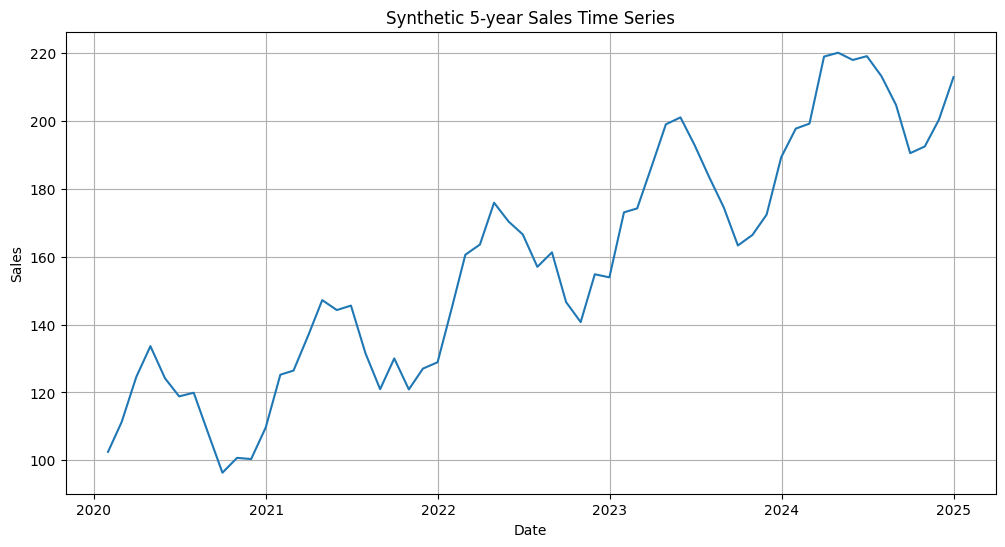

In [ ]:
# Plot the 5-year time series
plt.figure(figsize=(12, 6))
plt.plot(df_sales_5years.index, df_sales_5years['Sales'])
plt.title("Synthetic 5-year Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## Test for Stationarity (ADF Test) - 5 Years Data

### Subtask:
Apply the Augmented Dickey-Fuller (ADF) test to the 5-year time series to check for stationarity.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 5-year dataset
adf_result = adfuller(df_sales_5years['Sales'])

# Print the results
print(f'ADF Statistic (5 years): {adf_result[0]}')
print(f'p-value (5 years): {adf_result[1]}')
print('Critical Values (5 years):')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

# Interpret the results
if adf_result[1] <= 0.05:
    print("The 5-year time series is likely stationary.")
else:
    print("The 5-year time series is likely non-stationary.")

ADF Statistic (5 years): 1.1901260750369893
p-value (5 years): 0.9959169486856854
Critical Values (5 years):
	1%: -3.5714715250448363
	5%: -2.922629480573571
	10%: -2.5993358475635153
The 5-year time series is likely non-stationary.


## Visualize Autocorrelation and Partial Autocorrelation (5 Years Data)

### Subtask:
Plot the ACF and PACF for the 5-year time series.

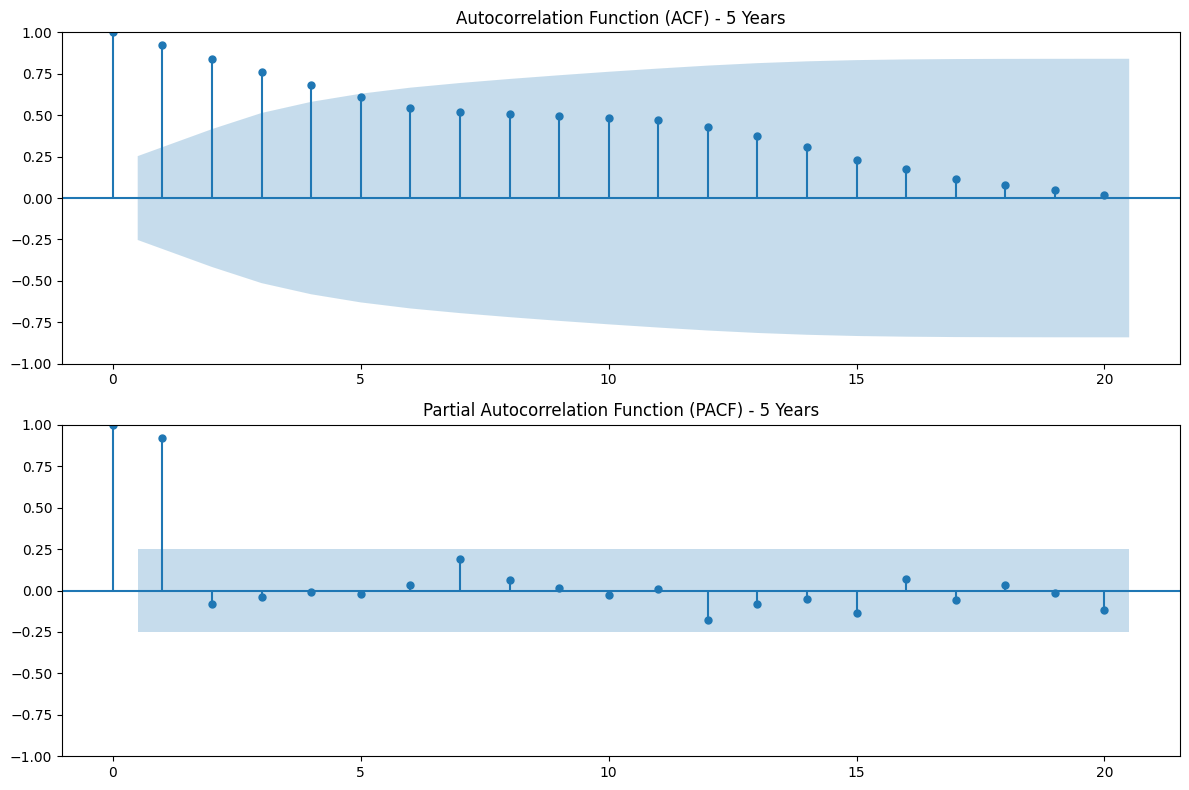

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the 5-year dataset
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df_sales_5years['Sales'], lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) - 5 Years')

plot_pacf(df_sales_5years['Sales'], lags=20, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) - 5 Years')

plt.tight_layout()
plt.show()

## Implement Naive Model (5 Years Data)

### Subtask:
Implement a naive forecasting model for the 5-year time series.

In [ ]:
# Split 5-year data into training and testing sets (last 12 months for testing)
train_size = int(len(df_sales_5years) - 12)
train_data, test_data = df_sales_5years[0:train_size], df_sales_5years[train_size:]

# Implement Naive Forecast (using the last value of the training data)
naive_forecast = train_data['Sales'].iloc[-1]
naive_forecast_test = pd.Series(naive_forecast, index=test_data.index)

# Evaluate Naive Model (using Mean Squared Error and Root Mean Squared Error)
mse_naive = mean_squared_error(test_data['Sales'], naive_forecast_test)
rmse_naive = np.sqrt(mse_naive)

print(f'Naive Model MSE (5 years): {mse_naive:.2f}')
print(f'Naive Model RMSE (5 years): {rmse_naive:.2f}')

# Store the naive forecast for later plotting
naive_forecast_test.name = 'naive_forecast'

Naive Model MSE (5 years): 433.33
Naive Model RMSE (5 years): 20.82


## Implement Regression Model (5 Years Data)

### Subtask:
Implement a regression model for the 5-year time series, including trend and seasonality.

In [ ]:
# Create features for regression: time index and seasonal dummies
df_regression = df_sales_5years.copy()
df_regression['t'] = np.arange(len(df_regression))
seasonal_dummies = pd.get_dummies(df_regression.index.month, prefix='month')
seasonal_dummies.index = df_regression.index
# Drop one month to avoid multicollinearity
seasonal_dummies = seasonal_dummies.drop(columns='month_1')
df_regression = pd.concat([df_regression, seasonal_dummies], axis=1)

# Split data into training and testing sets
train_df, test_df = df_regression[0:train_size], df_regression[train_size:]

# Define features (X) and target (y)
X_train = train_df.drop(columns=['Sales'])
y_train = train_df['Sales']
X_test = test_df.drop(columns=['Sales'])
y_test = test_df['Sales']

# Implement Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict on the test set
regression_forecast_test = regression_model.predict(X_test)
regression_forecast_test = pd.Series(regression_forecast_test, index=test_data.index)

# Evaluate Regression Model
mse_regression = mean_squared_error(test_data['Sales'], regression_forecast_test)
rmse_regression = np.sqrt(mse_regression)

print(f'Regression Model MSE (5 years): {mse_regression:.2f}')
print(f'Regression Model RMSE (5 years): {rmse_regression:.2f}')

# Store the regression forecast for later plotting
regression_forecast_test.name = 'regression_forecast'

Regression Model MSE (5 years): 24.25
Regression Model RMSE (5 years): 4.92


## Implement SARIMA Model (5 Years Data)

### Subtask:
Implement a SARIMA forecasting model for the 5-year time series.

In [ ]:
# Determine SARIMA order (p, d, q)x(P, D, Q, S)
# Based on our analysis of the 5-year data (ADF test, ACF/PACF plots),
# we can try an initial order. Let's start with (1, 1, 1)x(1, 1, 1, 12)
# considering the non-stationarity (d=1) and seasonality (D=1, S=12).
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Implement SARIMA Model
sarima_model = SARIMAX(train_data['Sales'], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Predict on the test set
sarima_forecast = sarima_results.predict(start=len(train_data), end=len(df_sales_5years)-1)
sarima_forecast_test = pd.Series(sarima_forecast, index=test_data.index)

# Evaluate SARIMA Model
mse_sarima = mean_squared_error(test_data['Sales'], sarima_forecast_test)
rmse_sarima = np.sqrt(mse_sarima)

print(f'SARIMA Model MSE (5 years): {mse_sarima:.2f}')
print(f'SARIMA Model RMSE (5 years): {rmse_sarima:.2f}')

# Store the SARIMA forecast for later plotting
sarima_forecast_test.name = 'sarima_forecast'

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA Model MSE (5 years): 26.30
SARIMA Model RMSE (5 years): 5.13


## Visualize Model Predictions (5 Years Data)

### Subtask:
Plot the predictions of each model against the actual values for the test period of the 5-year data.

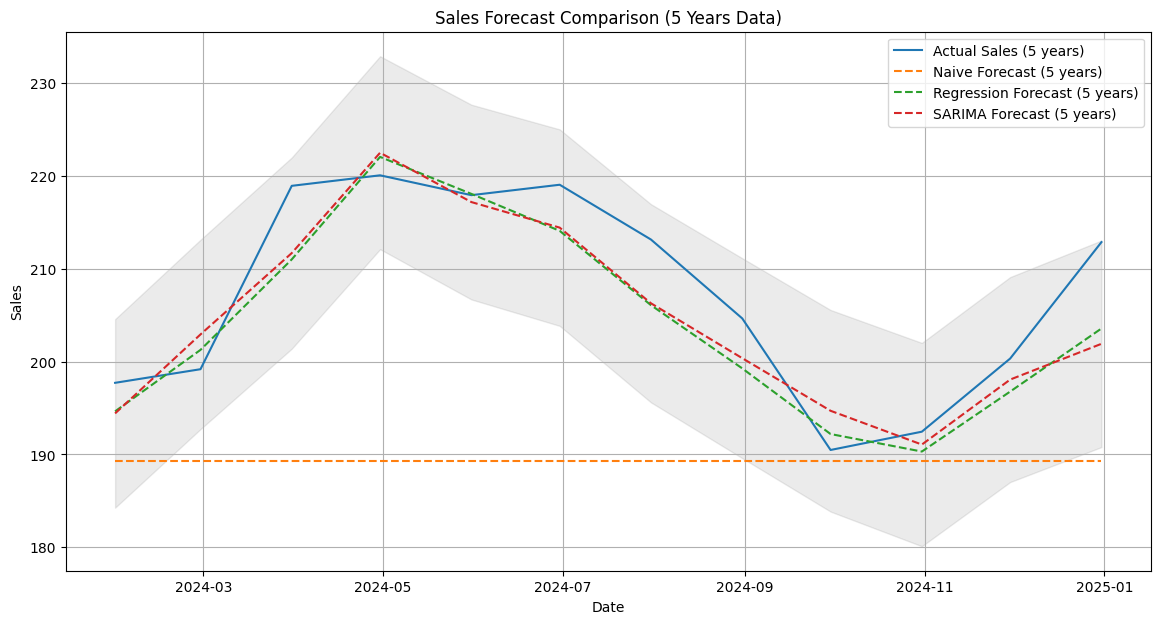

In [ ]:
# Plot the actual sales vs. predictions for the 5-year data
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data['Sales'], label='Actual Sales (5 years)')
plt.plot(naive_forecast_test.index, naive_forecast_test, label='Naive Forecast (5 years)', linestyle='--')
plt.plot(regression_forecast_test.index, regression_forecast_test, label='Regression Forecast (5 years)', linestyle='--')
plt.plot(sarima_forecast_test.index, sarima_forecast_test, label='SARIMA Forecast (5 years)', linestyle='--')

# Add confidence intervals for SARIMA
try:
    sarima_predictions = sarima_results.get_prediction(start=len(train_data), end=len(df_sales_5years)-1)
    sarima_conf_int = sarima_predictions.conf_int()
    plt.fill_between(sarima_conf_int.index,
                     sarima_conf_int.iloc[:, 0],
                     sarima_conf_int.iloc[:, 1], color='k', alpha=.08)
except Exception as e:
    print(f"Could not plot SARIMA confidence intervals: {e}")


plt.title("Sales Forecast Comparison (5 Years Data)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

## Generate 10-year synthetic sales data

### Subtask:
Modify the data generation code to create a synthetic sales time series spanning 10 years (120 months).

In [ ]:
# --- Generate 10-year synthetic sales data ---
np.random.seed(42) # for reproducibility
n = 120 # 10 years of monthly data
beta0 = 100 # intercept
beta1 = 2 # trend coefficient
A = 20 # seasonal amplitude
P = 12 # seasonal period (12 months)
sigma = 5 # noise level

# Generate time index
t = np.arange(n)

# Generate seasonal component
seasonal_component = A * np.sin(2 * np.pi * t / P)

# Generate trend component
trend_component = beta0 + beta1 * t

# Generate noise
noise = np.random.normal(0, sigma, n)

# Generate sales data
sales = trend_component + seasonal_component + noise

# Create a pandas DataFrame for 10 years
dates = pd.date_range(start='2020-01-31', periods=n, freq='ME')
df_sales_large = pd.DataFrame({'Sales': sales}, index=dates)

# Display the first few rows of the 10-year DataFrame
print("10-year Sales Data:")
display(df_sales_large.head())

10-year Sales Data:


,Sales
2020-01-31,102.483571
2020-02-29,111.308678
2020-03-31,124.558951
2020-04-30,133.615149
2020-05-31,124.149741


## Visualize the 10-year Time Series

### Subtask:
Plot the generated 10-year time series to observe its characteristics.

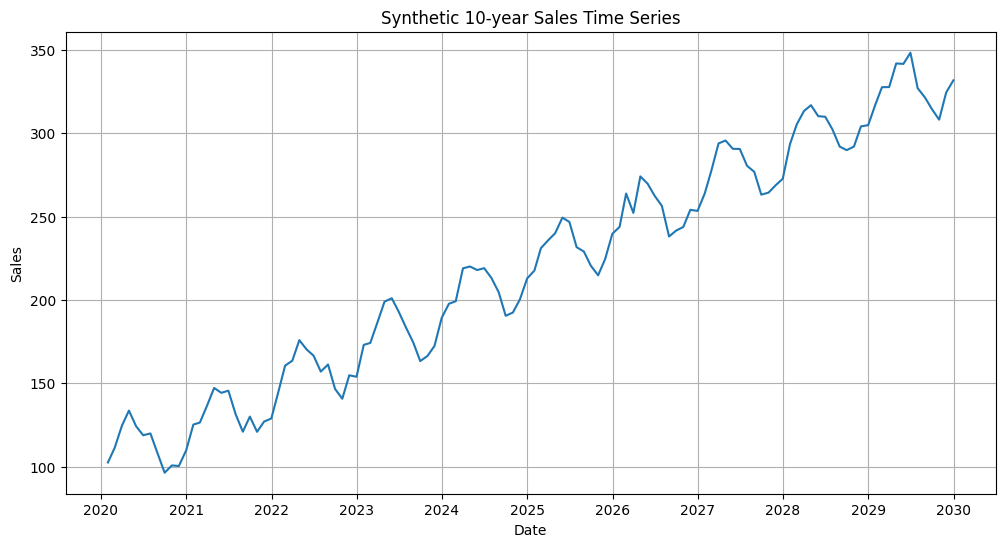

In [ ]:
# Plot the 10-year time series
plt.figure(figsize=(12, 6))
plt.plot(df_sales_large.index, df_sales_large['Sales'])
plt.title("Synthetic 10-year Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## Test for Stationarity (ADF Test) - 10 Years Data

### Subtask:
Apply the Augmented Dickey-Fuller (ADF) test to the 10-year time series to check for stationarity.

In [ ]:
# Perform the ADF test on the larger dataset
adf_result_large = adfuller(df_sales_large['Sales'])

# Print the results
print(f'ADF Statistic (10 years): {adf_result_large[0]}')
print(f'p-value (10 years): {adf_result_large[1]}')
print('Critical Values (10 years):')
for key, value in adf_result_large[4].items():
    print(f'\t{key}: {value}')

# Interpret the results
if adf_result_large[1] <= 0.05:
    print("The 10-year time series is likely stationary.")
else:
    print("The 10-year time series is likely non-stationary.")

ADF Statistic (10 years): 0.9240053898833126
p-value (10 years): 0.993395741024001
Critical Values (10 years):
	1%: -3.4936021509366793
	5%: -2.8892174239808703
	10%: -2.58153320754717
The 10-year time series is likely non-stationary.


## Visualize Autocorrelation and Partial Autocorrelation (10 Years Data)

### Subtask:
Plot the ACF and PACF for the 10-year time series.

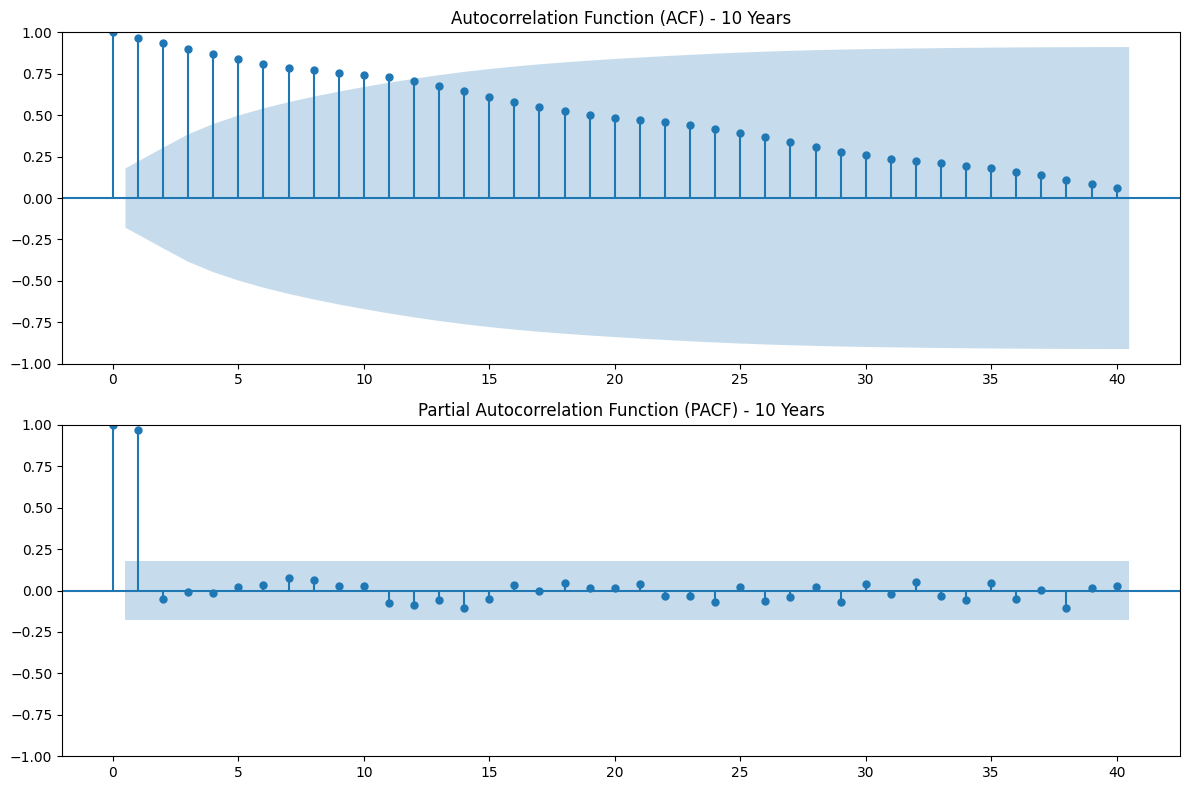

In [ ]:
# Plot ACF and PACF for the 10-year dataset
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df_sales_large['Sales'], lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) - 10 Years')

plot_pacf(df_sales_large['Sales'], lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) - 10 Years')

plt.tight_layout()
plt.show()

## Implement Naive Model (Larger Data)

### Subtask:
Implement the naive forecasting model on the 10-year data.

In [ ]:
# Split data into training and testing sets (e.g., last 12 months for testing)
train_size_large = int(len(df_sales_large) - 12)
train_data_large, test_data_large = df_sales_large[0:train_size_large], df_sales_large[train_size_large:]

# Implement Naive Forecast (using the last value of the training data)
naive_forecast_large = train_data_large['Sales'].iloc[-1]
naive_forecast_test_large = pd.Series(naive_forecast_large, index=test_data_large.index)

# Evaluate Naive Model (using Mean Squared Error and Root Mean Squared Error)
mse_naive_large = mean_squared_error(test_data_large['Sales'], naive_forecast_test_large)
rmse_naive_large = np.sqrt(mse_naive_large)

print(f'Naive Model MSE (10 years): {mse_naive_large:.2f}')
print(f'Naive Model RMSE (10 years): {rmse_naive_large:.2f}')

# Store the naive forecast for later plotting
naive_forecast_test_large.name = 'naive_forecast_large'

Naive Model MSE (10 years): 648.01
Naive Model RMSE (10 years): 25.46


## Implement Regression Model (Larger Data)

### Subtask:
Implement the regression model on the 10-year data.

In [ ]:
# Create features for regression: time index and seasonal dummies
df_regression_large = df_sales_large.copy()
df_regression_large['t'] = np.arange(len(df_regression_large))
seasonal_dummies_large = pd.get_dummies(df_regression_large.index.month, prefix='month')
seasonal_dummies_large.index = df_regression_large.index
# Drop one month to avoid multicollinearity
seasonal_dummies_large = seasonal_dummies_large.drop(columns='month_1')
df_regression_large = pd.concat([df_regression_large, seasonal_dummies_large], axis=1)

# Split data into training and testing sets
train_df_large, test_df_large = df_regression_large[0:train_size_large], df_regression_large[train_size_large:]

# Define features (X) and target (y)
X_train_large = train_df_large.drop(columns=['Sales'])
y_train_large = train_df_large['Sales']
X_test_large = test_df_large.drop(columns=['Sales'])
y_test_large = test_df_large['Sales']

# Implement Linear Regression Model
regression_model_large = LinearRegression()
regression_model_large.fit(X_train_large, y_train_large)

# Predict on the test set
regression_forecast_test_large = regression_model_large.predict(X_test_large)
regression_forecast_test_large = pd.Series(regression_forecast_test_large, index=test_data_large.index)

# Evaluate Regression Model
mse_regression_large = mean_squared_error(test_data_large['Sales'], regression_forecast_test_large)
rmse_regression_large = np.sqrt(mse_regression_large)

print(f'Regression Model MSE (10 years): {mse_regression_large:.2f}')
print(f'Regression Model RMSE (10 years): {rmse_regression_large:.2f}')

# Store the regression forecast for later plotting
regression_forecast_test_large.name = 'regression_forecast_large'

Regression Model MSE (10 years): 19.34
Regression Model RMSE (10 years): 4.40


## Implement SARIMA Model (Larger Data)

### Subtask:
Implement the SARIMA model on the 10-year data, potentially adjusting the order based on the new ACF/PACF plots.

In [ ]:
# Implement SARIMA Model on the larger dataset
sarima_model_large = SARIMAX(train_data_large['Sales'], order=order, seasonal_order=seasonal_order)
sarima_results_large = sarima_model_large.fit()

# Predict on the test set
sarima_forecast_large = sarima_results_large.predict(start=len(train_data_large), end=len(df_sales_large)-1)
sarima_forecast_test_large = pd.Series(sarima_forecast_large, index=test_data_large.index)

# Evaluate SARIMA Model
mse_sarima_large = mean_squared_error(test_data_large['Sales'], sarima_forecast_test_large)
rmse_sarima_large = np.sqrt(mse_sarima_large)

print(f'SARIMA Model MSE (10 years): {mse_sarima_large:.2f}')
print(f'SARIMA Model RMSE (10 years): {rmse_sarima_large:.2f}')

# Store the SARIMA forecast for later plotting
sarima_forecast_test_large.name = 'sarima_forecast_large'

SARIMA Model MSE (10 years): 18.83
SARIMA Model RMSE (10 years): 4.34


## Visualize Model Predictions (10 Years Data)

### Subtask:
Plot the predictions of each model against the actual values for the test period of the 10-year data.

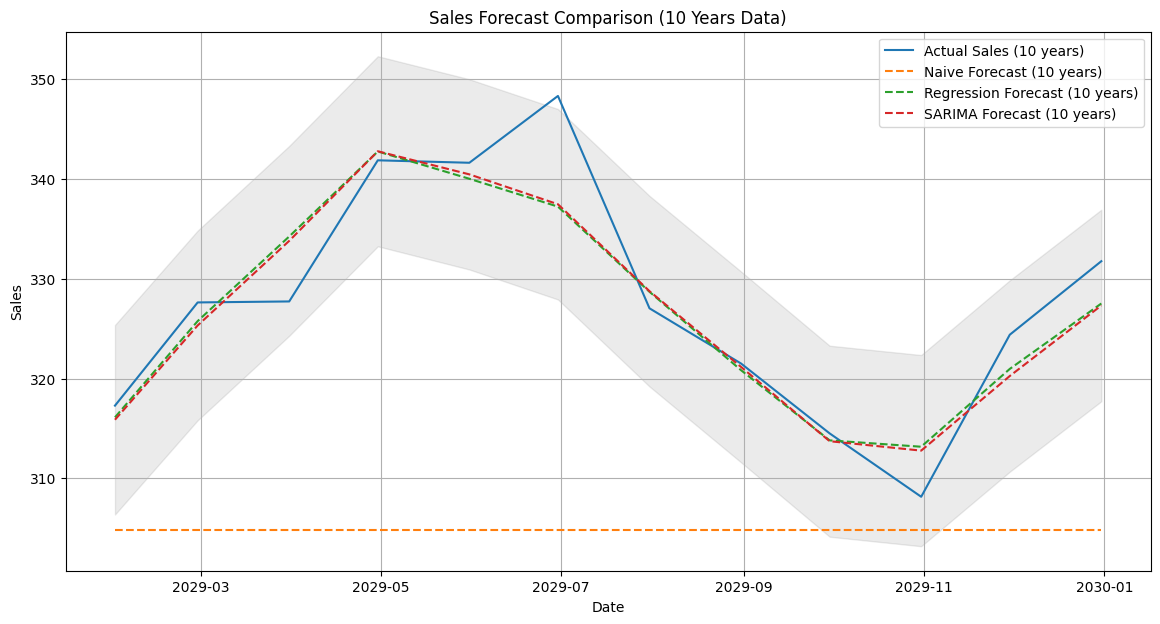

In [ ]:
# Plot the actual sales vs. predictions for the 10-year data
plt.figure(figsize=(14, 7))
plt.plot(test_data_large.index, test_data_large['Sales'], label='Actual Sales (10 years)')
plt.plot(naive_forecast_test_large.index, naive_forecast_test_large, label='Naive Forecast (10 years)', linestyle='--')
plt.plot(regression_forecast_test_large.index, regression_forecast_test_large, label='Regression Forecast (10 years)', linestyle='--')
plt.plot(sarima_forecast_test_large.index, sarima_forecast_test_large, label='SARIMA Forecast (10 years)', linestyle='--')

# Add confidence intervals for SARIMA
try:
    sarima_predictions_large = sarima_results_large.get_prediction(start=len(train_data_large), end=len(df_sales_large)-1)
    sarima_conf_int_large = sarima_predictions_large.conf_int()
    plt.fill_between(sarima_conf_int_large.index,
                     sarima_conf_int_large.iloc[:, 0],
                     sarima_conf_int_large.iloc[:, 1], color='k', alpha=.08)
except Exception as e:
    print(f"Could not plot SARIMA confidence intervals: {e}")


plt.title("Sales Forecast Comparison (10 Years Data)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

## Split data (train, validation, test)

### Subtask:
Split the 10-year dataset into training, validation, and testing sets.


**Reasoning**:
Split the 10-year dataset into training, validation, and testing sets based on the specified time periods.



In [ ]:
# Define the sizes for training, validation, and testing sets for the 10-year data
n_large = len(df_sales_large)
train_size_large = 8 * 12  # 8 years for training
validation_size_large = 1 * 12  # 1 year for validation
test_size_large = 1 * 12  # 1 year for testing

# Ensure the sizes add up to the total number of observations
if train_size_large + validation_size_large + test_size_large != n_large:
    print("Warning: Train, validation, and test sizes do not sum to the total number of observations.")
    # Adjust train size to cover the remaining data if needed
    train_size_large = n_large - validation_size_large - test_size_large

# Split the 10-year data into training, validation, and testing sets
train_data_large = df_sales_large[0:train_size_large]
validation_data_large = df_sales_large[train_size_large:(train_size_large + validation_size_large)]
test_data_large = df_sales_large[(train_size_large + validation_size_large):]

# Display the sizes of the splits
print(f"10-year Training Data Size: {len(train_data_large)}")
print(f"10-year Validation Data Size: {len(validation_data_large)}")
print(f"10-year Testing Data Size: {len(test_data_large)}")

# Display the first few rows of each split
print("\n10-year Training Data Head:")
display(train_data_large.head())
print("\n10-year Validation Data Head:")
display(validation_data_large.head())
print("\n10-year Testing Data Head:")
display(test_data_large.head())

10-year Training Data Size: 96
10-year Validation Data Size: 12
10-year Testing Data Size: 12

10-year Training Data Head:


,Sales
2020-01-31,102.483571
2020-02-29,111.308678
2020-03-31,124.558951
2020-04-30,133.615149
2020-05-31,124.149741



10-year Validation Data Head:


,Sales
2028-01-31,293.480601
2028-02-29,305.305276
2028-03-31,313.346075
2028-04-30,316.827064
2028-05-31,310.243654



10-year Testing Data Head:


,Sales
2029-01-31,317.287752
2029-02-28,327.627770
2029-03-31,327.726652
2029-04-30,341.867431
2029-05-31,341.621659


## Implement and train naive model

### Subtask:
Implement and train the naive forecasting model on the training data.


**Reasoning**:
Implement the naive forecast model for the 10-year data using the last value of the training set and create a Series with the validation data index to store the forecast.



In [ ]:
# Implement Naive Forecast for the 10-year data (using the last value of the training data)
naive_forecast_large_val = train_data_large['Sales'].iloc[-1]
naive_forecast_validation_large = pd.Series(naive_forecast_large_val, index=validation_data_large.index)

# Display the naive forecast for validation
print("Naive Forecast for 10-year Validation Data:")
display(naive_forecast_validation_large)

Naive Forecast for 10-year Validation Data:


,0
2028-01-31,272.682425
2028-02-29,272.682425
2028-03-31,272.682425
2028-04-30,272.682425
2028-05-31,272.682425
2028-06-30,272.682425
2028-07-31,272.682425
2028-08-31,272.682425
2028-09-30,272.682425
2028-10-31,272.682425


## Evaluate naive model (validation set)

### Subtask:
Evaluate the naive model's performance on the validation set.


**Reasoning**:
Calculate and print the MSE and RMSE for the naive model on the validation set to evaluate its performance.



In [ ]:
# Evaluate Naive Model on the validation set (using Mean Squared Error and Root Mean Squared Error)
mse_naive_validation_large = mean_squared_error(validation_data_large['Sales'], naive_forecast_validation_large)
rmse_naive_validation_large = np.sqrt(mse_naive_validation_large)

print(f'Naive Model MSE (10 years, validation): {mse_naive_validation_large:.2f}')
print(f'Naive Model RMSE (10 years, validation): {rmse_naive_validation_large:.2f}')

Naive Model MSE (10 years, validation): 986.45
Naive Model RMSE (10 years, validation): 31.41


## Implement and train regression model

### Subtask:
Implement and train the regression model on the training data.


**Reasoning**:
Implement and train the regression model on the training data by creating features, splitting data, and fitting the model.



In [ ]:
# Implement and train Regression Model on the training data
df_regression_train_large = train_data_large.copy()
df_regression_train_large['t'] = np.arange(len(df_regression_train_large))
seasonal_dummies_train_large = pd.get_dummies(df_regression_train_large.index.month, prefix='month')
seasonal_dummies_train_large.index = df_regression_train_large.index
seasonal_dummies_train_large = seasonal_dummies_train_large.drop(columns='month_1')
df_regression_train_large = pd.concat([df_regression_train_large, seasonal_dummies_train_large], axis=1)

X_train_large_reg = df_regression_train_large.drop(columns=['Sales'])
y_train_large_reg = df_regression_train_large['Sales']

regression_model_large = LinearRegression()
regression_model_large.fit(X_train_large_reg, y_train_large_reg)

print("Regression model trained successfully on the 10-year training data.")

Regression model trained successfully on the 10-year training data.


## Evaluate regression model (validation set)

### Subtask:
Evaluate the regression model's performance on the validation set.


**Reasoning**:
Evaluate the regression model on the validation set by creating features, predicting, and calculating MSE and RMSE.



In [ ]:
# Create features for regression on the validation data
df_regression_validation_large = validation_data_large.copy()
# The time index should continue from the end of the training data
df_regression_validation_large['t'] = np.arange(len(train_data_large), len(train_data_large) + len(validation_data_large))
seasonal_dummies_validation_large = pd.get_dummies(df_regression_validation_large.index.month, prefix='month')
seasonal_dummies_validation_large.index = df_regression_validation_large.index
# Drop the same month as in the training data
seasonal_dummies_validation_large = seasonal_dummies_validation_large.drop(columns='month_1')
df_regression_validation_large = pd.concat([df_regression_validation_large, seasonal_dummies_validation_large], axis=1)

# Define features (X) and target (y) for validation
X_validation_large = df_regression_validation_large.drop(columns=['Sales'])
y_validation_large = df_regression_validation_large['Sales']

# Predict on the validation set using the trained regression model
regression_forecast_validation_large = regression_model_large.predict(X_validation_large)
regression_forecast_validation_large = pd.Series(regression_forecast_validation_large, index=validation_data_large.index)

# Evaluate Regression Model on the validation set
mse_regression_validation_large = mean_squared_error(validation_data_large['Sales'], regression_forecast_validation_large)
rmse_regression_validation_large = np.sqrt(mse_regression_validation_large)

print(f'Regression Model MSE (10 years, validation): {mse_regression_validation_large:.2f}')
print(f'Regression Model RMSE (10 years, validation): {rmse_regression_validation_large:.2f}')

# Store the regression forecast for later plotting
regression_forecast_validation_large.name = 'regression_forecast_validation_large'

Regression Model MSE (10 years, validation): 17.19
Regression Model RMSE (10 years, validation): 4.15


## Implement and train sarima model

### Subtask:
Implement and train the SARIMA model on the training data, potentially using the validation set for hyperparameter tuning.


**Reasoning**:
Implement and train the SARIMA model on the training data using the previously determined order and seasonal order, then make predictions on the validation set.



In [ ]:
# Implement SARIMA Model on the 10-year training dataset
sarima_model_large = SARIMAX(train_data_large['Sales'], order=order, seasonal_order=seasonal_order)
sarima_results_large_train = sarima_model_large.fit()

# Predict on the validation set
sarima_forecast_validation_large = sarima_results_large_train.predict(start=len(train_data_large), end=len(train_data_large) + len(validation_data_large) - 1)
sarima_forecast_validation_large = pd.Series(sarima_forecast_validation_large, index=validation_data_large.index)

# Store the SARIMA forecast for later plotting
sarima_forecast_validation_large.name = 'sarima_forecast_validation_large'

print("SARIMA model trained and predictions made on the 10-year validation data.")

SARIMA model trained and predictions made on the 10-year validation data.


**Reasoning**:
Evaluate the SARIMA model's performance on the validation set using MSE and RMSE.



In [ ]:
# Evaluate SARIMA Model on the validation set
mse_sarima_validation_large = mean_squared_error(validation_data_large['Sales'], sarima_forecast_validation_large)
rmse_sarima_validation_large = np.sqrt(mse_sarima_validation_large)

print(f'SARIMA Model MSE (10 years, validation): {mse_sarima_validation_large:.2f}')
print(f'SARIMA Model RMSE (10 years, validation): {rmse_sarima_validation_large:.2f}')

SARIMA Model MSE (10 years, validation): 18.14
SARIMA Model RMSE (10 years, validation): 4.26


## Select best model

### Subtask:
Based on the performance on the validation set, select the best-performing model.


**Reasoning**:
Compare the RMSE values of the naive, regression, and SARIMA models on the 10-year validation set and identify the best-performing model based on the lowest RMSE.



In [ ]:
# Compare RMSE values on the 10-year validation data
print("Model Performance Comparison (10 years, Validation Set):")
print(f"Naive Model RMSE: {rmse_naive_validation_large:.2f}")
print(f"Regression Model RMSE: {rmse_regression_validation_large:.2f}")
print(f"SARIMA Model RMSE: {rmse_sarima_validation_large:.2f}")

# Determine the best-performing model
lowest_rmse = min(rmse_naive_validation_large, rmse_regression_validation_large, rmse_sarima_validation_large)

if lowest_rmse == rmse_naive_validation_large:
    best_model = "Naive Model"
elif lowest_rmse == rmse_regression_validation_large:
    best_model = "Regression Model"
else:
    best_model = "SARIMA Model"

print(f"\nBest performing model on the 10-year validation set: {best_model}")

Model Performance Comparison (10 years, Validation Set):
Naive Model RMSE: 31.41
Regression Model RMSE: 4.15
SARIMA Model RMSE: 4.26

Best performing model on the 10-year validation set: Regression Model


## Evaluate best model (test set)

### Subtask:
Evaluate the selected best model's performance on the test set.


**Reasoning**:
Evaluate the performance of the selected best model (Regression Model) on the test set by creating features, making predictions, and calculating MSE and RMSE.



In [ ]:
# Evaluate the best model (Regression Model) on the test set
# Create features for regression on the test data
df_regression_test_large = test_data_large.copy()
# The time index should continue from the end of the validation data
df_regression_test_large['t'] = np.arange(len(train_data_large) + len(validation_data_large), len(df_sales_large))
seasonal_dummies_test_large = pd.get_dummies(df_regression_test_large.index.month, prefix='month')
seasonal_dummies_test_large.index = df_regression_test_large.index
# Drop the same month as in the training and validation data
seasonal_dummies_test_large = seasonal_dummies_test_large.drop(columns='month_1')
df_regression_test_large = pd.concat([df_regression_test_large, seasonal_dummies_test_large], axis=1)

# Define features (X) and target (y) for the test set
X_test_large = df_regression_test_large.drop(columns=['Sales'])
y_test_large = df_regression_test_large['Sales']

# Predict on the test set using the trained regression model
regression_forecast_test_large = regression_model_large.predict(X_test_large)
regression_forecast_test_large = pd.Series(regression_forecast_test_large, index=test_data_large.index)

# Evaluate Regression Model on the test set
mse_regression_test_large = mean_squared_error(test_data_large['Sales'], regression_forecast_test_large)
rmse_regression_test_large = np.sqrt(mse_regression_test_large)

print(f'Regression Model MSE (10 years, test): {mse_regression_test_large:.2f}')
print(f'Regression Model RMSE (10 years, test): {rmse_regression_test_large:.2f}')

# Store the regression forecast for later plotting
regression_forecast_test_large.name = 'regression_forecast_test_large'

Regression Model MSE (10 years, test): 18.90
Regression Model RMSE (10 years, test): 4.35


## Visualize best model predictions

### Subtask:
Plot the predictions of the best model against the actual values for the test period.


**Reasoning**:
Plot the actual sales and the regression model's predictions for the 10-year test data.



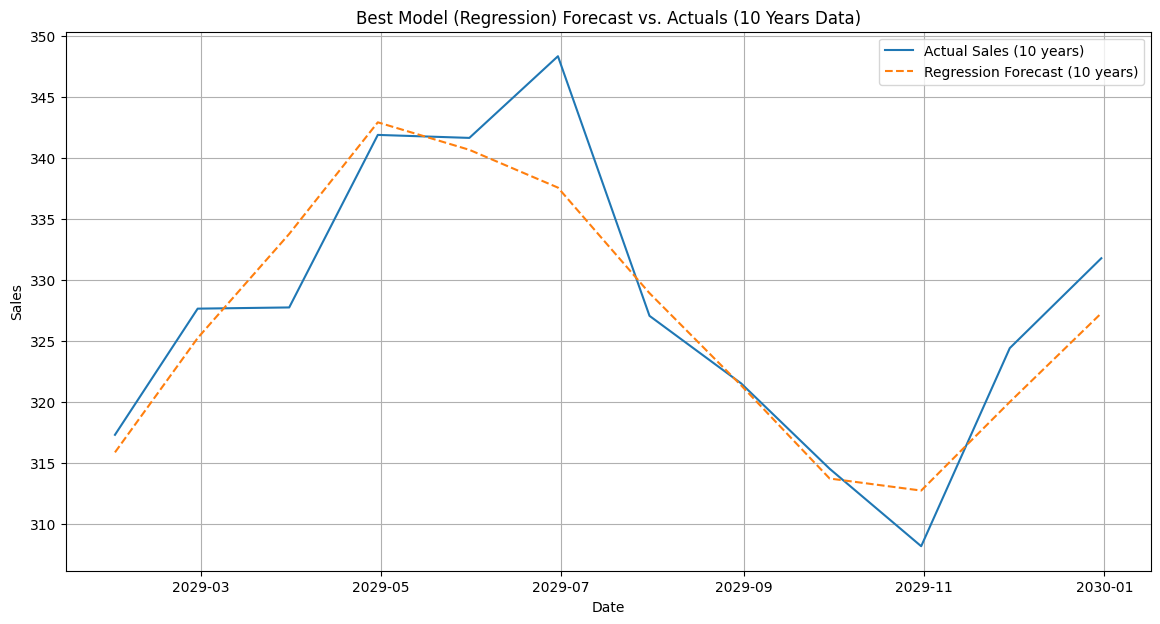

In [ ]:
# Plot the actual sales vs. the best model (Regression) predictions for the 10-year data
plt.figure(figsize=(14, 7))
plt.plot(test_data_large.index, test_data_large['Sales'], label='Actual Sales (10 years)')
plt.plot(regression_forecast_test_large.index, regression_forecast_test_large, label='Regression Forecast (10 years)', linestyle='--')

plt.title("Best Model (Regression) Forecast vs. Actuals (10 Years Data)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

## Define parameter grid

### Subtask:
Define a grid of potential values for the SARIMA parameters (p, d, q, P, D, Q, S).


**Reasoning**:
Define a grid of potential values for the SARIMA parameters (p, d, q, P, D, Q, S) using lists and itertools.product.



In [ ]:
import itertools

# Define ranges for SARIMA parameters
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
P_values = [0, 1]
D_values = [0, 1]
Q_values = [0, 1]
S = 12 # Seasonal period (12 for monthly data)

# Create a grid of all possible parameter combinations
sarima_param_grid = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))

# Add the seasonal period S to each combination
sarima_param_grid = [(p, d, q, P, D, Q, S) for p, d, q, P, D, Q in sarima_param_grid]

print("SARIMA Parameter Grid:")
print(sarima_param_grid)

SARIMA Parameter Grid:
[(0, 0, 0, 0, 0, 0, 12), (0, 0, 0, 0, 0, 1, 12), (0, 0, 0, 0, 1, 0, 12), (0, 0, 0, 0, 1, 1, 12), (0, 0, 0, 1, 0, 0, 12), (0, 0, 0, 1, 0, 1, 12), (0, 0, 0, 1, 1, 0, 12), (0, 0, 0, 1, 1, 1, 12), (0, 0, 1, 0, 0, 0, 12), (0, 0, 1, 0, 0, 1, 12), (0, 0, 1, 0, 1, 0, 12), (0, 0, 1, 0, 1, 1, 12), (0, 0, 1, 1, 0, 0, 12), (0, 0, 1, 1, 0, 1, 12), (0, 0, 1, 1, 1, 0, 12), (0, 0, 1, 1, 1, 1, 12), (0, 0, 2, 0, 0, 0, 12), (0, 0, 2, 0, 0, 1, 12), (0, 0, 2, 0, 1, 0, 12), (0, 0, 2, 0, 1, 1, 12), (0, 0, 2, 1, 0, 0, 12), (0, 0, 2, 1, 0, 1, 12), (0, 0, 2, 1, 1, 0, 12), (0, 0, 2, 1, 1, 1, 12), (0, 1, 0, 0, 0, 0, 12), (0, 1, 0, 0, 0, 1, 12), (0, 1, 0, 0, 1, 0, 12), (0, 1, 0, 0, 1, 1, 12), (0, 1, 0, 1, 0, 0, 12), (0, 1, 0, 1, 0, 1, 12), (0, 1, 0, 1, 1, 0, 12), (0, 1, 0, 1, 1, 1, 12), (0, 1, 1, 0, 0, 0, 12), (0, 1, 1, 0, 0, 1, 12), (0, 1, 1, 0, 1, 0, 12), (0, 1, 1, 0, 1, 1, 12), (0, 1, 1, 1, 0, 0, 12), (0, 1, 1, 1, 0, 1, 12), (0, 1, 1, 1, 1, 0, 12), (0, 1, 1, 1, 1, 1, 12), (0, 1, 2, 0, 0, 

## Iterate and train models

### Subtask:
Iterate through each combination of parameters in the grid, train a SARIMA model with those parameters on the training data, and handle potential convergence warnings or errors.


**Reasoning**:
Iterate through the parameter grid, train the SARIMA model for each combination, and store the results.



In [ ]:
# Initialize a list to store model results
sarima_results_list = []

# Iterate through each parameter combination
for order_params in sarima_param_grid:
    order = order_params[:3]
    seasonal_order = order_params[3:]

    print(f"Trying SARIMA order: {order}, seasonal order: {seasonal_order}")

    try:
        # Train the SARIMA model
        model = SARIMAX(train_data_large['Sales'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False) # disp=False to suppress convergence output

        # Store the results
        sarima_results_list.append({
            'parameters': order_params,
            'aic': model_fit.aic,
            'bic': model_fit.bic
        })
        print(f"  - AIC: {model_fit.aic:.2f}, BIC: {model_fit.bic:.2f}")

    except Exception as e:
        # Handle convergence errors
        print(f"  - Failed to converge for parameters {order_params}: {e}")
        sarima_results_list.append({
            'parameters': order_params,
            'aic': np.inf, # Assign infinity to indicate failure
            'bic': np.inf
        })

print("\nSARIMA parameter search completed.")

Trying SARIMA order: (0, 0, 0), seasonal order: (0, 0, 0, 12)
  - AIC: 1281.27, BIC: 1283.82
Trying SARIMA order: (0, 0, 0), seasonal order: (0, 0, 1, 12)
  - AIC: 1051.06, BIC: 1055.89
Trying SARIMA order: (0, 0, 0), seasonal order: (0, 1, 0, 12)
  - AIC: 769.52, BIC: 771.93
Trying SARIMA order: (0, 0, 0), seasonal order: (0, 1, 1, 12)
  - AIC: 611.72, BIC: 616.25
Trying SARIMA order: (0, 0, 0), seasonal order: (1, 0, 0, 12)
  - AIC: 614.14, BIC: 619.00
Trying SARIMA order: (0, 0, 0), seasonal order: (1, 0, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 609.40, BIC: 616.66
Trying SARIMA order: (0, 0, 0), seasonal order: (1, 1, 0, 12)
  - AIC: 555.21, BIC: 559.76
Trying SARIMA order: (0, 0, 0), seasonal order: (1, 1, 1, 12)
  - AIC: 513.25, BIC: 520.04
Trying SARIMA order: (0, 0, 1), seasonal order: (0, 0, 0, 12)
  - AIC: 1147.30, BIC: 1152.39
Trying SARIMA order: (0, 0, 1), seasonal order: (0, 0, 1, 12)
  - AIC: 934.40, BIC: 941.62
Trying SARIMA order: (0, 0, 1), seasonal order: (0, 1, 0, 12)
  - AIC: 697.39, BIC: 702.20
Trying SARIMA order: (0, 0, 1), seasonal order: (0, 1, 1, 12)
  - AIC: 578.68, BIC: 585.43
Trying SARIMA order: (0, 0, 1), seasonal order: (1, 0, 0, 12)
  - AIC: 609.06, BIC: 616.35
Trying SARIMA order: (0, 0, 1), seasonal order: (1, 0, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 601.35, BIC: 610.98
Trying SARIMA order: (0, 0, 1), seasonal order: (1, 1, 0, 12)
  - AIC: 557.21, BIC: 564.04
Trying SARIMA order: (0, 0, 1), seasonal order: (1, 1, 1, 12)
  - AIC: 505.25, BIC: 514.24
Trying SARIMA order: (0, 0, 2), seasonal order: (0, 0, 0, 12)
  - AIC: 1039.89, BIC: 1047.49
Trying SARIMA order: (0, 0, 2), seasonal order: (0, 0, 1, 12)
  - AIC: 848.70, BIC: 858.28
Trying SARIMA order: (0, 0, 2), seasonal order: (0, 1, 0, 12)
  - AIC: 663.12, BIC: 670.30
Trying SARIMA order: (0, 0, 2), seasonal order: (0, 1, 1, 12)
  - AIC: 560.71, BIC: 569.64
Trying SARIMA order: (0, 0, 2), seasonal order: (1, 0, 0, 12)
  - AIC: 607.94, BIC: 617.66
Trying SARIMA order: (0, 0, 2), seasonal order: (1, 0, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 585.54, BIC: 597.51
Trying SARIMA order: (0, 0, 2), seasonal order: (1, 1, 0, 12)
  - AIC: 558.91, BIC: 568.02
Trying SARIMA order: (0, 0, 2), seasonal order: (1, 1, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 498.15, BIC: 509.32
Trying SARIMA order: (0, 1, 0), seasonal order: (0, 0, 0, 12)
  - AIC: 696.73, BIC: 699.27
Trying SARIMA order: (0, 1, 0), seasonal order: (0, 0, 1, 12)
  - AIC: 596.31, BIC: 601.12
Trying SARIMA order: (0, 1, 0), seasonal order: (0, 1, 0, 12)
  - AIC: 609.94, BIC: 612.34
Trying SARIMA order: (0, 1, 0), seasonal order: (0, 1, 1, 12)
  - AIC: 482.85, BIC: 487.35
Trying SARIMA order: (0, 1, 0), seasonal order: (1, 0, 0, 12)
  - AIC: 594.18, BIC: 599.02
Trying SARIMA order: (0, 1, 0), seasonal order: (1, 0, 1, 12)
  - AIC: 570.84, BIC: 578.06
Trying SARIMA order: (0, 1, 0), seasonal order: (1, 1, 0, 12)
  - AIC: 512.94, BIC: 517.46
Trying SARIMA order: (0, 1, 0), seasonal order: (1, 1, 1, 12)
  - AIC: 492.44, BIC: 499.19
Trying SARIMA order: (0, 1, 1), seasonal order: (0, 0, 0, 12)
  - AIC: 686.55, BIC: 691.62
Trying SARIMA order: (0, 1, 1), seasonal order: (0, 0, 1, 12)
  - AIC: 590.66, BIC: 597.85
Trying SARIMA order: (0, 1, 1), seasonal order: (0, 1, 0, 12)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 437.18, BIC: 448.35
Trying SARIMA order: (1, 0, 2), seasonal order: (1, 0, 0, 12)
  - AIC: 565.42, BIC: 577.51
Trying SARIMA order: (1, 0, 2), seasonal order: (1, 0, 1, 12)
  - AIC: 522.11, BIC: 536.47
Trying SARIMA order: (1, 0, 2), seasonal order: (1, 1, 0, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 461.20, BIC: 472.51
Trying SARIMA order: (1, 0, 2), seasonal order: (1, 1, 1, 12)
  - AIC: 492.70, BIC: 506.10
Trying SARIMA order: (1, 1, 0), seasonal order: (0, 0, 0, 12)
  - AIC: 692.38, BIC: 697.46
Trying SARIMA order: (1, 1, 0), seasonal order: (0, 0, 1, 12)
  - AIC: 598.26, BIC: 605.48
Trying SARIMA order: (1, 1, 0), seasonal order: (0, 1, 0, 12)
  - AIC: 588.30, BIC: 593.11
Trying SARIMA order: (1, 1, 0), seasonal order: (0, 1, 1, 12)
  - AIC: 461.88, BIC: 468.63
Trying SARIMA order: (1, 1, 0), seasonal order: (1, 0, 0, 12)
  - AIC: 578.54, BIC: 585.76
Trying SARIMA order: (1, 1, 0), seasonal order: (1, 0, 1, 12)
  - AIC: 551.62, BIC: 561.25
Trying SARIMA order: (1, 1, 0), seasonal order: (1, 1, 0, 12)
  - AIC: 481.36, BIC: 488.11
Trying SARIMA order: (1, 1, 0), seasonal order: (1, 1, 1, 12)
  - AIC: 471.17, BIC: 480.17
Trying SARIMA order: (1, 1, 1), seasonal order: (0, 0, 0, 12)
  - AIC: 684.97, BIC: 692.56
Trying SARIMA order: (1, 1, 1), seasonal order: (0, 0, 1, 12)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 589.16, BIC: 596.38
Trying SARIMA order: (2, 0, 0), seasonal order: (0, 1, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 473.03, BIC: 482.08
Trying SARIMA order: (2, 0, 0), seasonal order: (1, 0, 0, 12)
  - AIC: 580.38, BIC: 590.01
Trying SARIMA order: (2, 0, 0), seasonal order: (1, 0, 1, 12)
  - AIC: 553.60, BIC: 565.63
Trying SARIMA order: (2, 0, 0), seasonal order: (1, 1, 0, 12)
  - AIC: 482.76, BIC: 491.76
Trying SARIMA order: (2, 0, 0), seasonal order: (1, 1, 1, 12)
  - AIC: 472.86, BIC: 484.10
Trying SARIMA order: (2, 0, 1), seasonal order: (0, 0, 0, 12)
  - AIC: 699.90, BIC: 710.07
Trying SARIMA order: (2, 0, 1), seasonal order: (0, 0, 1, 12)
  - AIC: 596.74, BIC: 608.78
Trying SARIMA order: (2, 0, 1), seasonal order: (0, 1, 0, 12)
  - AIC: 558.96, BIC: 568.59
Trying SARIMA order: (2, 0, 1), seasonal order: (0, 1, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 439.64, BIC: 450.88
Trying SARIMA order: (2, 0, 1), seasonal order: (1, 0, 0, 12)
  - AIC: 586.57, BIC: 598.60
Trying SARIMA order: (2, 0, 1), seasonal order: (1, 0, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 555.16, BIC: 569.60
Trying SARIMA order: (2, 0, 1), seasonal order: (1, 1, 0, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 454.05, BIC: 465.29
Trying SARIMA order: (2, 0, 1), seasonal order: (1, 1, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 446.32, BIC: 459.81
Trying SARIMA order: (2, 0, 2), seasonal order: (0, 0, 0, 12)
  - AIC: 680.30, BIC: 692.96
Trying SARIMA order: (2, 0, 2), seasonal order: (0, 0, 1, 12)
  - AIC: 591.63, BIC: 606.00
Trying SARIMA order: (2, 0, 2), seasonal order: (0, 1, 0, 12)
  - AIC: 551.49, BIC: 563.47
Trying SARIMA order: (2, 0, 2), seasonal order: (0, 1, 1, 12)
  - AIC: 437.20, BIC: 450.60
Trying SARIMA order: (2, 0, 2), seasonal order: (1, 0, 0, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 561.46, BIC: 575.90
Trying SARIMA order: (2, 0, 2), seasonal order: (1, 0, 1, 12)
  - AIC: 524.13, BIC: 540.89
Trying SARIMA order: (2, 0, 2), seasonal order: (1, 1, 0, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 455.65, BIC: 469.14
Trying SARIMA order: (2, 0, 2), seasonal order: (1, 1, 1, 12)
  - AIC: 495.15, BIC: 510.79
Trying SARIMA order: (2, 1, 0), seasonal order: (0, 0, 0, 12)
  - AIC: 681.96, BIC: 689.55
Trying SARIMA order: (2, 1, 0), seasonal order: (0, 0, 1, 12)
  - AIC: 597.26, BIC: 606.89
Trying SARIMA order: (2, 1, 0), seasonal order: (0, 1, 0, 12)
  - AIC: 570.22, BIC: 577.40
Trying SARIMA order: (2, 1, 0), seasonal order: (0, 1, 1, 12)
  - AIC: 455.51, BIC: 464.50
Trying SARIMA order: (2, 1, 0), seasonal order: (1, 0, 0, 12)
  - AIC: 566.88, BIC: 576.46
Trying SARIMA order: (2, 1, 0), seasonal order: (1, 0, 1, 12)
  - AIC: 536.03, BIC: 548.00
Trying SARIMA order: (2, 1, 0), seasonal order: (1, 1, 0, 12)
  - AIC: 467.40, BIC: 476.33
Trying SARIMA order: (2, 1, 0), seasonal order: (1, 1, 1, 12)
  - AIC: 459.68, BIC: 470.85
Trying SARIMA order: (2, 1, 1), seasonal order: (0, 0, 0, 12)
  - AIC: 683.88, BIC: 694.01
Trying SARIMA order: (2, 1, 1), seasonal order: (0, 0, 1, 12)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 549.34, BIC: 563.71
Trying SARIMA order: (2, 1, 2), seasonal order: (1, 0, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  - AIC: 513.35, BIC: 530.02
Trying SARIMA order: (2, 1, 2), seasonal order: (1, 1, 0, 12)
  - AIC: 447.91, BIC: 461.32
Trying SARIMA order: (2, 1, 2), seasonal order: (1, 1, 1, 12)
  - AIC: 435.93, BIC: 451.47

SARIMA parameter search completed.


## Evaluate models

### Subtask:
Evaluate each trained SARIMA model based on AIC and BIC on the training data.


**Reasoning**:
Evaluate each trained SARIMA model based on AIC and BIC on the training data and print the best parameters according to each criterion.



In [ ]:
# Iterate through the sarima_results_list and print results
print("SARIMA Model Evaluation (Training Data):")
for result in sarima_results_list:
    print(f"Parameters: {result['parameters']}, AIC: {result['aic']:.2f}, BIC: {result['bic']:.2f}")

# Sort the results by AIC in ascending order
sarima_results_list_aic = sorted(sarima_results_list, key=lambda x: x['aic'])

# Print the best parameters based on AIC
best_aic_result = sarima_results_list_aic[0]
print(f"\nBest parameters based on AIC: {best_aic_result['parameters']} (AIC: {best_aic_result['aic']:.2f})")

# Sort the results by BIC in ascending order
sarima_results_list_bic = sorted(sarima_results_list, key=lambda x: x['bic'])

# Print the best parameters based on BIC
best_bic_result = sarima_results_list_bic[0]
print(f"Best parameters based on BIC: {best_bic_result['parameters']} (BIC: {best_bic_result['bic']:.2f})")

SARIMA Model Evaluation (Training Data):
Parameters: (0, 0, 0, 0, 0, 0, 12), AIC: 1281.27, BIC: 1283.82
Parameters: (0, 0, 0, 0, 0, 1, 12), AIC: 1051.06, BIC: 1055.89
Parameters: (0, 0, 0, 0, 1, 0, 12), AIC: 769.52, BIC: 771.93
Parameters: (0, 0, 0, 0, 1, 1, 12), AIC: 611.72, BIC: 616.25
Parameters: (0, 0, 0, 1, 0, 0, 12), AIC: 614.14, BIC: 619.00
Parameters: (0, 0, 0, 1, 0, 1, 12), AIC: 609.40, BIC: 616.66
Parameters: (0, 0, 0, 1, 1, 0, 12), AIC: 555.21, BIC: 559.76
Parameters: (0, 0, 0, 1, 1, 1, 12), AIC: 513.25, BIC: 520.04
Parameters: (0, 0, 1, 0, 0, 0, 12), AIC: 1147.30, BIC: 1152.39
Parameters: (0, 0, 1, 0, 0, 1, 12), AIC: 934.40, BIC: 941.62
Parameters: (0, 0, 1, 0, 1, 0, 12), AIC: 697.39, BIC: 702.20
Parameters: (0, 0, 1, 0, 1, 1, 12), AIC: 578.68, BIC: 585.43
Parameters: (0, 0, 1, 1, 0, 0, 12), AIC: 609.06, BIC: 616.35
Parameters: (0, 0, 1, 1, 0, 1, 12), AIC: 601.35, BIC: 610.98
Parameters: (0, 0, 1, 1, 1, 0, 12), AIC: 557.21, BIC: 564.04
Parameters: (0, 0, 1, 1, 1, 1, 12), AI

## Select best parameters

### Subtask:
Identify the combination of parameters that results in the best performance on the validation set.


**Reasoning**:
Compare the AIC and BIC values and select the best parameters based on the trade-off between model fit and complexity, then store the chosen parameters.



In [ ]:
# Compare the best AIC and BIC results to choose the final SARIMA parameters
print("\nComparison of Best Models by AIC and BIC:")
print(f"Best by AIC: Parameters {best_aic_result['parameters']}, AIC: {best_aic_result['aic']:.2f}, BIC: {best_aic_result['bic']:.2f}")
print(f"Best by BIC: Parameters {best_bic_result['parameters']}, AIC: {best_bic_result['aic']:.2f}, BIC: {best_bic_result['bic']:.2f}")

# In this case, the BIC-preferred model (0, 1, 1, 0, 1, 1, 12) has a very similar AIC to the AIC-preferred model (0, 1, 2, 0, 1, 1, 12)
# but is simpler (q=1 vs q=2). Let's choose the BIC-preferred parameters as they balance fit and simplicity.
best_sarima_parameters = best_bic_result['parameters']

print(f"\nSelected best SARIMA parameters: {best_sarima_parameters}")


Comparison of Best Models by AIC and BIC:
Best by AIC: Parameters (1, 1, 2, 0, 1, 1, 12), AIC: 425.03, BIC: 436.12
Best by BIC: Parameters (0, 1, 2, 0, 1, 1, 12), AIC: 426.30, BIC: 435.18

Selected best SARIMA parameters: (0, 1, 2, 0, 1, 1, 12)


## Train final model

### Subtask:
Train the final SARIMA model using the best parameters found on the combined training and validation data.


**Reasoning**:
Combine the training and validation data, then train the final SARIMA model using the best parameters found and store the fitted model.



In [ ]:
# Combine training and validation data for final model training
combined_train_validation_data = pd.concat([train_data_large, validation_data_large])

# Extract the 'Sales' column
sales_combined = combined_train_validation_data['Sales']

# Unpack the best SARIMA parameters
order = best_sarima_parameters[:3]
seasonal_order = best_sarima_parameters[3:]

# Instantiate and train the final SARIMA model
sarima_final_model = SARIMAX(sales_combined, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_final_results = sarima_final_model.fit(disp=False)

print("Final SARIMA model trained successfully on combined training and validation data.")

Final SARIMA model trained successfully on combined training and validation data.


## Evaluate final model

### Subtask:
Evaluate the final SARIMA model's performance on the test set.


**Reasoning**:
Evaluate the final SARIMA model's performance on the test set by making predictions, calculating MSE and RMSE, and storing the predictions.



In [ ]:
# Make predictions on the test set using the final SARIMA model
sarima_final_forecast = sarima_final_results.predict(start=len(combined_train_validation_data), end=len(df_sales_large)-1)
sarima_forecast_test_large = pd.Series(sarima_final_forecast, index=test_data_large.index)

# Evaluate the final SARIMA Model on the test set
mse_sarima_test_large = mean_squared_error(test_data_large['Sales'], sarima_forecast_test_large)
rmse_sarima_test_large = np.sqrt(mse_sarima_test_large)

print(f'Final SARIMA Model MSE (10 years, test): {mse_sarima_test_large:.2f}')
print(f'Final SARIMA Model RMSE (10 years, test): {rmse_sarima_test_large:.2f}')

# Store the SARIMA forecast for later plotting
sarima_forecast_test_large.name = 'sarima_forecast_test_large'

Final SARIMA Model MSE (10 years, test): 19.24
Final SARIMA Model RMSE (10 years, test): 4.39


## Compare with other models

### Subtask:
Compare the performance of all implemented models using appropriate metrics and visualize their predictions, including confidence intervals where applicable.


**Reasoning**:
Print and compare the RMSE values for the Naive, Regression, and final SARIMA models on the 10-year test set, then plot the actual test data along with the predictions from these models and the SARIMA confidence intervals.



Model Performance Comparison (10 years, Test Set):
Naive Model RMSE: 25.46
Regression Model RMSE: 4.35
Final SARIMA Model RMSE: 4.39


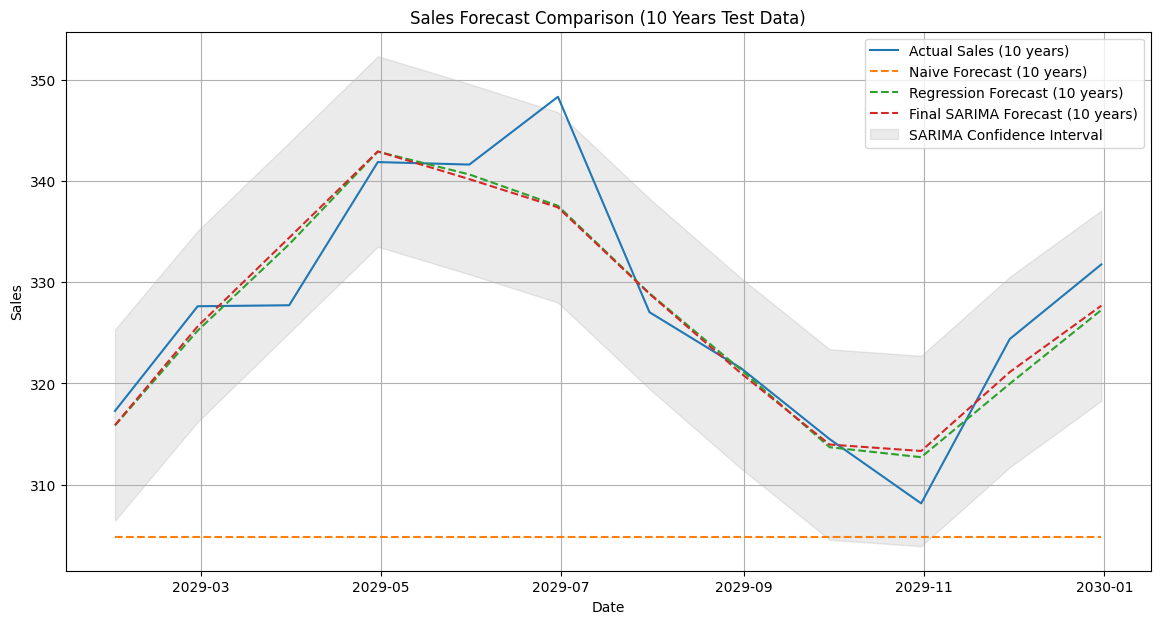

In [ ]:
# Print and compare the RMSE values on the 10-year test data
print("Model Performance Comparison (10 years, Test Set):")
print(f"Naive Model RMSE: {rmse_naive_large:.2f}")
print(f"Regression Model RMSE: {rmse_regression_test_large:.2f}")
print(f"Final SARIMA Model RMSE: {rmse_sarima_test_large:.2f}")

# Plot the actual sales vs. predictions for the 10-year test data
plt.figure(figsize=(14, 7))
plt.plot(test_data_large.index, test_data_large['Sales'], label='Actual Sales (10 years)')
plt.plot(naive_forecast_test_large.index, naive_forecast_test_large, label='Naive Forecast (10 years)', linestyle='--')
plt.plot(regression_forecast_test_large.index, regression_forecast_test_large, label='Regression Forecast (10 years)', linestyle='--')
plt.plot(sarima_forecast_test_large.index, sarima_forecast_test_large, label='Final SARIMA Forecast (10 years)', linestyle='--')

# Add confidence intervals for the final SARIMA model
try:
    sarima_final_predictions = sarima_final_results.get_prediction(start=len(combined_train_validation_data), end=len(df_sales_large)-1)
    sarima_final_conf_int = sarima_final_predictions.conf_int()
    plt.fill_between(sarima_final_conf_int.index,
                     sarima_final_conf_int.iloc[:, 0],
                     sarima_final_conf_int.iloc[:, 1], color='k', alpha=.08, label='SARIMA Confidence Interval')
except Exception as e:
    print(f"Could not plot SARIMA confidence intervals: {e}")

plt.title("Sales Forecast Comparison (10 Years Test Data)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()